<a href="https://colab.research.google.com/github/juanjordgz/Copia-de-Actividad-3.-Validaci-n-de-conceptos---ANOVA/blob/main/Copia_de_Actividad_3_Validaci%C3%B3n_de_conceptos_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels. formula.api as smf
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
#Carga desde un archivo .csv sin indice
datacacao = pd. read_csv('flavors_of_cacao.csv')
datacacao.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


**Elimina valores nulos**

In [ ]:
# Eliminamos filas con valores nulos en las columnas 'Broad Bean Origin' y 'Rating'
datacacao = datacacao.dropna(subset=['Broad Bean Origin', 'Rating'])

# Verificamos que los valores nulos hayan sido eliminados
datacacao.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Convierte 'Cocoa Percent' a tipo numérico con astype(float).

In [ ]:
datacacao['Cocoa Percent'] = datacacao['Cocoa Percent'].replace('[\%,]', '', regex=True).astype(float)

<ipython-input-64-aafc07575f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacacao['Cocoa Percent'] = datacacao['Cocoa Percent'].replace('[\%,]', '', regex=True).astype(float)


Filtra los países de interés en 'Broad Bean Origin' por la alta cardinalidad de origenes solo usar lo siguientes: selected_origins = ['Mexico', 'Colombia', 'Ghana', 'Nigeria', 'Cameroon', 'Madagascar', 'Togo', 'Uganda', 'Sierra Leone']

In [ ]:
selected_origins = ['Mexico', 'Colombia', 'Ghana', 'Nigeria', 'Cameroon', 'Madagascar', 'Togo', 'Uganda', 'Sierra Leone']
datacacao = datacacao[datacacao['Broad Bean Origin'].isin(selected_origins)]

**ANALISIS EXPLORATORIO DE DATOS**

Visualiza las distribuciones de 'Rating' por origen con sns.boxplot() y sns.violinplot()

Text(0.5, 1.0, 'Distribución de Rating por Origen (Boxplot)')

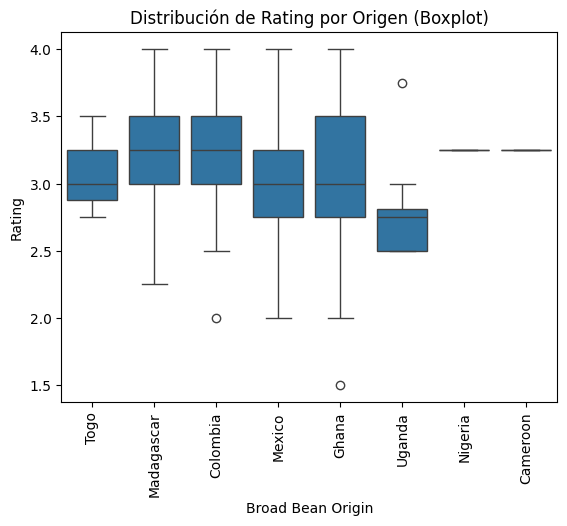

In [ ]:
#Boxplot
plt.subplot(1, 1, 1)
sns.boxplot(x='Broad Bean Origin', y='Rating', data=datacacao)
plt.xticks(rotation=90)
plt.title('Distribución de Rating por Origen (Boxplot)')


Text(0.5, 1.0, 'Distribución de Rating por Origen (Violinplot)')

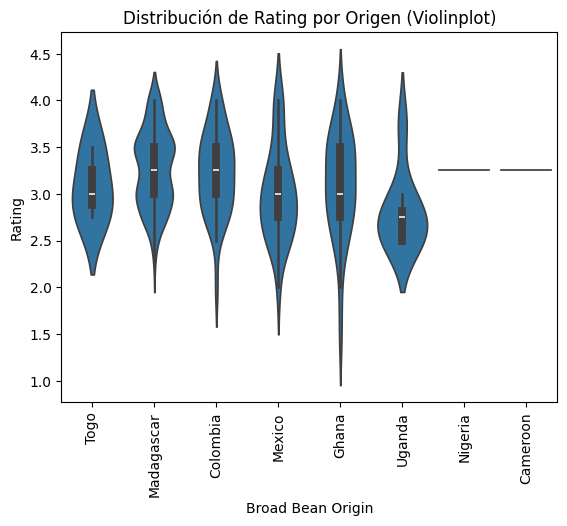

In [ ]:
#violinplot
plt.subplot(1, 1, 1)
sns.violinplot(x='Broad Bean Origin', y='Rating', data=datacacao)
plt.xticks(rotation=90)
plt.title('Distribución de Rating por Origen (Violinplot)')


**PRUEBAS DE SUPUESTOS**

Prueba la normalidad por grupo usando shapiro().

In [ ]:
#Aplicar la prueba de Shapiro-Wilk para normalidad
print("Prueba de Shapiro-Wilk para Normalidad:")
shapiro_test = shapiro(datacacao['Rating'])
print(f"Estadístico de prueba: {shapiro_test.statistic:.4f}")
print(f"Valor p: {shapiro_test.pvalue:.4f}")

# Interpretación
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print(f"Resultado: No se rechaza la hipótesis nula (p > {alpha}). Los datos siguen una distribución normal.\n")
else:
    print(f"Resultado: Se rechaza la hipótesis nula (p <= {alpha}). Los datos no siguen una distribución normal.\n")

Prueba de Shapiro-Wilk para Normalidad:
Estadístico de prueba: 0.9533
Valor p: 0.0000
Resultado: Se rechaza la hipótesis nula (p <= 0.05). Los datos no siguen una distribución normal.



Realiza el test de Levene para homogeneidad de varianzas con levene().

In [ ]:
# Agrupar los datos por especie
groups = [group["Rating"].values for name, group in datacacao.groupby("Broad Bean Origin")]

# Aplicar la prueba de Levene para homogeneidad de varianzas
levene_test = levene(*groups, center='median')
print("Prueba de Levene para Homogeneidad de Varianzas:")
print(f"Estadístico de prueba: {levene_test.statistic:.4f}")
print(f"Valor p: {levene_test.pvalue:.4f}")

# Interpretación
if levene_test.pvalue > alpha:
    print(f"Resultado: No se rechaza la hipótesis nula (p > {alpha}). Las varianzas son homogéneas.\n")
else:
    print(f"Resultado: Se rechaza la hipótesis nula (p <= {alpha}). Las varianzas no son homogéneas.\n")

Prueba de Levene para Homogeneidad de Varianzas:
Estadístico de prueba: 1.1429
Valor p: 0.3367
Resultado: No se rechaza la hipótesis nula (p > 0.05). Las varianzas son homogéneas.



**ANALISIS ANOVA**

Interpreta el valor p de ANOVA para verificar diferencias significativas.

In [ ]:
from scipy.stats import f_oneway

# Aplicar ANOVA de una vía
f_value, p_value = f_oneway(*groups)
print("Resultados ANOVA (SciPy):")
print(f"Estadístico F: {f_value:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print(f"Resultado: Se rechaza la hipótesis nula (p < {alpha}). Existen diferencias significativas entre las medias de las especies.\n")
else:
    print(f"Resultado: No se rechaza la hipótesis nula (p >= {alpha}). No existen diferencias significativas entre las medias de las especies.\n")

Resultados ANOVA (SciPy):
Estadístico F: 2.4220
Valor p: 0.0204
Resultado: Se rechaza la hipótesis nula (p < 0.05). Existen diferencias significativas entre las medias de las especies.



Ajusta un modelo OLS con ols('Rating ~ C(Broad_Bean_Origin)') y realiza ANOVA con anova_lm().

In [ ]:
# Definir el modelo OLS
modelo = ols('Rating ~ C(Q("Broad Bean Origin"))', data=datacacao).fit()

# Aplicar ANOVA
anova_resultados = sm.stats.anova_lm(modelo, typ=2)
print("Tabla ANOVA (Statsmodels):")
display(anova_resultados)

# Resumen del modelo
print("Resumen del Modelo OLS:")
print(modelo.summary())

Tabla ANOVA (Statsmodels):


,sum_sq,df,F,PR(>F)
"C(Q(""Broad Bean Origin""))",3.370764,7.0,2.422015,0.020382
Residual,50.300692,253.0,NaN,NaN


Resumen del Modelo OLS:
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.422
Date:                Mon, 14 Oct 2024   Prob (F-statistic):             0.0204
Time:                        00:45:02   Log-Likelihood:                -155.47
No. Observations:                 261   AIC:                             326.9
Df Residuals:                     253   BIC:                             355.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

**Prueba Post-hoc y Conclusiones**

Si ANOVA es significativo, realiza la prueba post-hoc con pairwise_tukeyhsd().

In [ ]:
# Aplicar la prueba de Tukey HSD
tukey = pairwise_tukeyhsd(endog=datacacao['Rating'],
                          groups=datacacao['Broad Bean Origin'],
                          alpha=0.05)
print("Resultados de la Prueba Post-hoc Tukey HSD:")
print(tukey)


Resultados de la Prueba Post-hoc Tukey HSD:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  Cameroon   Colombia   -0.025    1.0 -1.4048 1.3548  False
  Cameroon      Ghana  -0.1591    1.0 -1.5424 1.2243  False
  Cameroon Madagascar   0.0155    1.0  -1.352 1.3831  False
  Cameroon     Mexico  -0.2417 0.9995  -1.627 1.1437  False
  Cameroon    Nigeria      0.0    1.0 -1.9274 1.9274  False
  Cameroon       Togo  -0.1667    1.0 -1.7404  1.407  False
  Cameroon     Uganda  -0.4375 0.9834  -1.883  1.008  False
  Colombia      Ghana  -0.1341  0.906 -0.4546 0.1864  False
  Colombia Madagascar   0.0405 0.9996 -0.2029 0.2839  False
  Colombia     Mexico  -0.2167 0.4759 -0.5458 0.1125  False
  Colombia    Nigeria    0.025    1.0 -1.3548 1.4048  False
  Colombia       Togo  -0.1417 0.9995 -0.9575 0.6742  False
  Colombia     Uganda  -0.4125 0.2515 -0.9403 0.1153  Fa

Visualiza los resultados del test de Tukey usando tukey.plot_simultaneous().

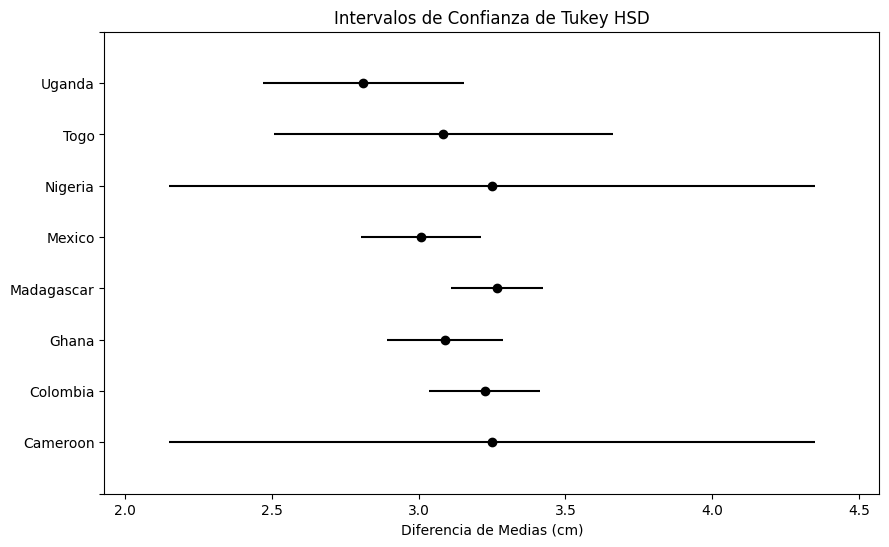

In [ ]:
# Visualizar los resultados
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Intervalos de Confianza de Tukey HSD")
plt.xlabel('Diferencia de Medias (cm)')
plt.show()

In [ ]:
# Convertir los resultados de Tukey a un DataFrame para una mejor visualización
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

Concluye si existen diferencias significativas entre los grupos.

In [ ]:
print("\n## Conclusiones\n")

# Interpretación del ANOVA
if p_value < alpha:
    print("1. **Resultados ANOVA**: Existe una diferencia estadísticamente significativa en la anchura de sépalo entre las diferentes especies de Iris (p < 0.05).")
else:
    print("1. **Resultados ANOVA**: No existe una diferencia estadísticamente significativa en la anchura de sépalo entre las diferentes especies de Iris (p >= 0.05).")

# Interpretación del Post-hoc
print("\n2. **Prueba Post-hoc Tukey HSD**:")
if tukey_df['reject'].any():
    print("   - Se encontraron diferencias significativas entre las siguientes parejas de especies:")
    for index, row in tukey_df.iterrows():
        if row['reject']:
            print(f"     - {row['group1']} vs {row['group2']}: Diferencia de medias = {row['meandiff']:.4f} cm (p-ajustado = {row['p-adj']:.4f})")
else:
    print("   - No se encontraron diferencias significativas entre ninguna de las parejas de especies.")


## Conclusiones

1. **Resultados ANOVA**: Existe una diferencia estadísticamente significativa en la anchura de sépalo entre las diferentes especies de Iris (p < 0.05).

2. **Prueba Post-hoc Tukey HSD**:
   - No se encontraron diferencias significativas entre ninguna de las parejas de especies.
